In [1]:
import collections
import json
import numpy as np
import pandas as pd
import scipy.stats

# Mortality rates data

survival_rates_2018-200.csv comes from https://www150.statcan.gc.ca/t1/tbl1/en/cv!recreate.action?pid=1310011401&selectedNodeIds=4D5&checkedLevels=0D2,1D1,2D2&refPeriods=20180101,20180101&dimensionLayouts=layout2,layout3,layout2,layout2,layout2&vectorDisplay=false

In [2]:
column_types = collections.defaultdict(lambda:np.float64)
column_types["Age"]=str
survival = pd.read_csv("survival_rates_2018-2020.csv", dtype=column_types)

In [3]:
mortality = 1-survival[[c for c in survival.columns if c != "Age"]]
mortality

Newfoundland and Labrador Males  Newfoundland and Labrador Females  \
0                            0.00572                            0.00407   
1                            0.00069                            0.00065   
2                            0.00041                            0.00038   
3                            0.00026                            0.00024   
4                            0.00018                            0.00017   
..                               ...                                ...   
106                          0.46145                            0.44038   
107                          0.47779                            0.45877   
108                          0.49333                            0.47631   
109                          0.50800                            0.49293   
110                          1.00000                            1.00000   

     Nova Scotia Males  Nova Scotia Females  New Brunswick Males  \
0              0.00371              0.00425              0.00497   
1              0.00061              0.00071              0.00058   
2              0.00034              0.00036              0.00026   
3              0.00020              0.00021              0.00014   
4              0.00014              0.00014              0.00008   
..                 ...                  ...                  ...   
106            0.49559              0.44385              0.48428   
107            0.51214              0.46316              0.50132   
108            0.52754              0.48150              0.51727   
109            0.54178              0.49879              0.53209   
110            1.00000              1.00000              1.00000   

     New Brunswick Females  Quebec Males  Quebec Females  Ontario Males  \
0                  0.00308       0.00447         0.00377        0.00472   
1                  0.00062       0.00022         0.00019        0.00024   
2                  0.00037       0.00015         0.00015        0.00017   
3                  0.00024       0.00011         0.00013        0.00013   
4                  0.00017       0.00008         0.00011        0.00010   
..                     ...           ...             ...            ...   
106                0.42848       0.46628         0.43568        0.47296   
107                0.44831       0.48416         0.45593        0.49115   
108                0.46726       0.50102         0.47519        0.50820   
109                0.48523       0.51680         0.49336        0.52408   
110                1.00000       1.00000         1.00000        1.00000   

     Ontario Females  Manitoba Males  Manitoba Females  Saskatchewan Males  \
0            0.00397         0.00655           0.00569             0.00618   
1            0.00019         0.00032           0.00065             0.00064   
2            0.00014         0.00025           0.00038             0.00041   
3            0.00011         0.00020           0.00024             0.00028   
4            0.00009         0.00017           0.00017             0.00020   
..               ...             ...               ...                 ...   
106          0.44194         0.45528           0.42459             0.44348   
107          0.46285         0.47290           0.44456             0.46098   
108          0.48262         0.48962           0.46368             0.47769   
109          0.50116         0.50539           0.48184             0.49356   
110          1.00000         1.00000           1.00000             1.00000   

     Saskatchewan Females  Alberta Males  Alberta Females  \
0                 0.00549        0.00553          0.00449   
1                 0.00069        0.00021          0.00015   
2                 0.00037        0.00018          0.00011   
3                 0.00023        0.00015          0.00009   
4                 0.00015        0.00013          0.00007   
..                    ...            ...              ...   
106               0.40

# Distributions

In [4]:
p = mortality.apply(lambda row: (1, 1) if row.max() == 1 else scipy.stats.beta.fit(row.values, floc=0, fscale=1)[:2], axis=1, result_type="expand")
p.columns = ["alpha", "beta"]
p[["mean", "mode"]] = p.apply(lambda row: (row["alpha"]/(row["alpha"]+row["beta"]), (np.nan if (row["alpha"], row["beta"]) == (1, 1) else (row["alpha"]-1)/(row["alpha"]+row["beta"]-2))), axis=1, result_type="expand")

In [5]:
print(json.dumps(p[["alpha", "beta"]].values.tolist(), indent=2))

[
  [
    22.942145174216563,
    4896.156942853802
  ],
  [
    3.2274222432243036,
    7512.177819099385
  ],
  [
    5.1736580119311215,
    19766.808322582176
  ],
  [
    8.13709996346605,
    46050.938343900816
  ],
  [
    9.892482771869837,
    76412.7440052529
  ],
  [
    12.440070962457295,
    119731.57730562013
  ],
  [
    13.839654041617182,
    156661.48406432726
  ],
  [
    14.034385881859725,
    175415.76523907023
  ],
  [
    14.073269308601699,
    178379.48018489574
  ],
  [
    13.63618632134931,
    163620.5978130709
  ],
  [
    10.135223311495501,
    108581.59707121666
  ],
  [
    8.448333311210908,
    80028.46708919026
  ],
  [
    7.836994433835919,
    62135.825600932294
  ],
  [
    7.52276501174948,
    48701.1136724243
  ],
  [
    7.815654199195234,
    40302.19568406876
  ],
  [
    6.429711384125278,
    25318.427916036428
  ],
  [
    4.940807944202135,
    14743.592305896751
  ],
  [
    4.188712092397455,
    10061.972471363913
  ],
  [
    4.1

# Visualization

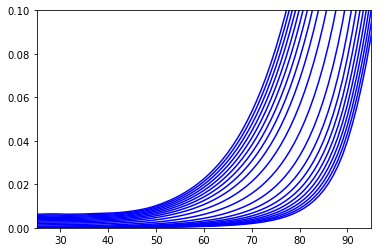

In [6]:
import matplotlib.pyplot as plt
X = np.concatenate([np.array([10**(-i) for i in range(10, 0, -1)]),
                    np.array([.5]),
                    #np.array([.125, .25, .5, .75, .875]),
                    np.array([1-10**(-i) for i in range(10, 0, -1)])
                    #,[1-5.55111512312578331841574054436957454041294162715e-17]
                   ])
g = p.apply(lambda row: scipy.stats.beta(row["alpha"], row["beta"], 0, 1).ppf(X), axis=1, result_type="expand")
g.columns = X
g.plot(legend=False, c="b", xlim=(25, 95), ylim=(.0, .1))
#_, ax = plt.subplots(1, 2, figsize=(10, 3), gridspec_kw={'width_ratios': [4, 1]})
#g.plot(ax=ax[0], legend=False, c="b", xlim=(25, 90),   ylim=(.0, .1), alpha=.5, linewidth=.5)
#g.plot(ax=ax[1], legend=False, c="b", xlim=(80, 109), ylim=(.0, .5),  alpha=1,  linewidth=.5/3)